<a href="https://colab.research.google.com/github/ShwaiR/Google_Colab/blob/main/Example0502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
mi = 5*10
mi

50

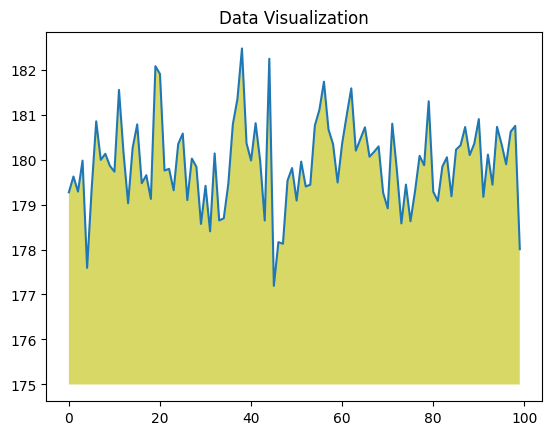

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 

ys = 180 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 175, where=(ys > 175), facecolor='y', alpha = 0.6)

plt.title("Data Visualization")
plt.show()

In [ ]:
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x = 'Horsepower',
    y = 'Misles',
    color = alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection = interval
)

之後再解決互動式資料視覺化

0.9666666666666667


[Text(0.5, 0.9, 'x[2] <= 2.6\ngini = 0.665\nsamples = 120\nvalue = [44, 38, 38]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 76\nvalue = [0, 38, 38]'),
 Text(0.3076923076923077, 0.5, 'x[2] <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.15384615384615385, 0.3, 'x[3] <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'x[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7692307692307693, 0.3, 'x[0] <= 5.

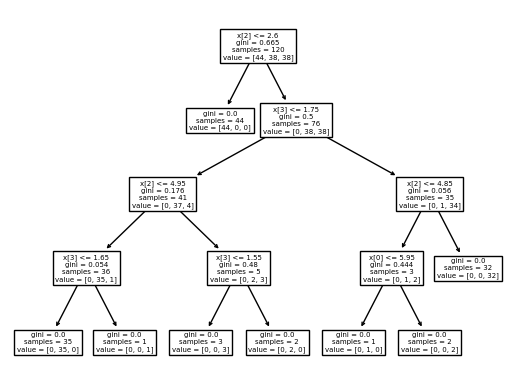

In [ ]:
from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_data = iris.data
iris_label = iris.target
(train_data, test_data, train_label, test_label) = train_test_split(iris_data, iris_label, test_size = 0.2)

model = tree.DecisionTreeClassifier()
model.fit(train_data, train_label)

predicted = model.predict(test_data)
print(metrics.accuracy_score(test_label,predicted))
tree.plot_tree(model)

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model, layers
from PIL import Image
import numpy as np

## 資料目錄來源 以資料夾當作分類 , e.g. Datasets/cats, Datasets/dogs, ...
src_dir = r'Datasets/'
## 單次預測圖片
predict_img = r'Datasets/dog/test5.png'

## 影像讀取處理
datagen = ImageDataGenerator(validation_split=0.2, preprocessing_function=preprocess_input)
train_generator = datagen.flow_from_directory(src_dir, target_size=(224, 224), batch_size=20, subset='training')
valid_generator = datagen.flow_from_directory(src_dir, target_size=(224, 224), batch_size=20, subset='validation')

## 模型建立
mobilenetV2 = MobileNetV2(include_top=False, pooling='avg')
for mlayer in mobilenetV2.layers:
    mlayer.trainable = False
mobilenetV2output = mobilenetV2.layers[-1].output
fc = layers.Dense(units=train_generator.num_classes, activation='softmax', name='custom_fc') (mobilenetV2output)
classification_model = Model(
            inputs=mobilenetV2.inputs,
            outputs=fc)
classification_model.compile(loss='categorical_crossentropy', optimizer='Adam')

## 模型訓練
history = classification_model.fit(train_generator, epochs=20, validation_data=valid_generator)

## 單次預測
true_labels_dict = {}
for key in train_generator.class_indices:
    true_labels_dict[train_generator.class_indices[key]] = key

def pred(img_path):
    img = preprocess_input(np.array(Image.open(img_path).convert('RGB')))
    img = np.array([img])
    result_prob = classification_model.predict(img).tolist()[0]
    max_index = result_prob.index(max(result_prob))
    print(true_labels_dict[max_index], result_prob[max_index])

pred(predict_img)

Found 5 images belonging to 3 classes.
Found 1 images belonging to 3 classes.


Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 1.3897 - val_loss: 0.2339
Epoch 2/20
1/1 [==============================] - 0s 93ms/step - loss: 0.9424 - val_loss: 0.1116
Epoch 3/20
1/1 [==============================] - 0s 97ms/step - loss: 0.6006 - val_loss: 0.0528
Epoch 4/20
1/1 [==============================] - 0s 141ms/step - loss: 0.3650 - val_loss: 0.0255
Epoch 5/20
1/1 [==============================] - 0s 93ms/step - loss: 0.2169 - val_loss: 0.0129
Epoch 6/20
1/1 [==============================] - 0s 107ms/step - loss: 0.1293 - val_loss: 0.0069
Epoch 7/20
1/1 [==============================] - 0s 132ms/step - loss: 0.0789 - val_loss: 0.0039
Epoch 8/20
1/1 [==============================] - 0s 92ms/step - loss: 0.0498 - val_loss: 0.0023
Epoch 9/20
1/1 [==============================] - 0s 100ms/step - loss: 0.0326 - val_loss: 0.0014
Epoch 10/20
1/1 [==============================] - 0s 99ms/step - loss: 0.0221 - val_loss: 9.2106e-04
Epoch 11/20
1/1 [======

1/1 [==============================] - 1s 681ms/step
dog 0.9998143315315247


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
